Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [1]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [ ]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
%cd TDDI2022/
# Klasörün içeriğinin görülmesi için
%ls

Veri İskeleti TDDI2022 klasöründe bulunan yarışma kapsamında yarışmacılara sağlanan **kanunum-nlp-doc-analysis-dataset.csv** dosyasının içindeki verileri pandas ile okuyarak oluşturulacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [4]:
df = pd.read_csv('kanunum-nlp-doc-analysis-dataset.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4142 non-null   int64  
 1   kategori        4142 non-null   object 
 2   baslik          4142 non-null   object 
 3   rega_no         2527 non-null   object 
 4   mukerrer_no     3642 non-null   float64
 5   rega_tarihi     2527 non-null   object 
 6   kurum           2488 non-null   object 
 7   mevzuat_no      1091 non-null   object 
 8   belge_sayi      43 non-null     object 
 9   mevzuat_tarihi  1905 non-null   object 
 10  donem           500 non-null    object 
 11  sira_no         500 non-null    object 
 12  madde_sayisi    4142 non-null   int64  
 13  data_text       4142 non-null   object 
 14  url             4142 non-null   object 
 15  kanunum_url     4142 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 517.9+ KB


Veri İskeletinde **kategori** sütununun / alanının kaç gruptan ve bu grupların kaç satırdan / kayıttan oluştuğunu **en az sayıdaki belgeden en çok sayıdaki belgeye doğru** ekrana yazdırılacaktır.

In [5]:
print(df.groupby('kategori').size().sort_values())

kategori
Cumhurbaşkanlığı Kararnamesi     54
Tüzük                            82
Kanun Hükmünde Kararname         91
Genelge                         385
Komisyon Raporu                 500
Kanun                           514
Resmi Gazete                    546
Yönetmelik                      597
Tebliğ                          623
Özelge                          750
dtype: int64


Yukarıdaki bulgular doğrultusunda örnek bir kaydın 'data_text' verisini yazdırıp, **belge türü** ile ilgili bilgi içerip içermediğini görmek için kategori alanındaki veriyi de ekrana yazdıralım. Ayrıca dokümanı küçük hafre çevirelim ve lower() komutunun nasıl bir çeviri yaptığını izleyelim.

In [25]:
satir = 2542
print('Kategori:',df['kategori'][satir],'\n',35*'-','\nİçerik:',df['data_text'][satir].lower(),sep='')

Kategori:Tebliğ
-----------------------------------
İçerik:resmî gazete tarihi: 30.12.2012 resmî gazete sayısı: 28513 2. mükerrer
japonyadan i̇thal edi̇lecek gida ve tarim ürünleri̇ni̇n radyasyon kontrolü tebli̇ği̇ (ürün güvenliği ve denetimi: 2013/2)

amaç ve kapsam



**Tebliğ** olarak kategori edilen toplam **623** adet kayıt vardır. Bu kayıtlar üzerinde belge türü tespit etmek için bir fonksiyon oluşturacağız. Bu fonksiyon veriyi analiz edecektir. **Mevcut 623 kayıttan kaçında doğru sonuç verdiğini de kontrol edeceğiz.**

In [26]:
# Tebliğ olarak kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulTEBLIG(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace(' ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  verilenMetin = verilenMetin.replace(':','')
  verilenMetin = verilenMetin.replace('.','')
  verilenMetin = verilenMetin.replace('ý','ı')
  verilenMetin = verilenMetin.replace('i̇','i')
  # data_text alanındaki kayıdın ilk parçasında ne varsa o bir YÖNETMELİKTİR diye kontrol ediyoruz!
  if verilenMetin.lower().find('tebl')!=-1:
    return 'Tebliğ'
  # Başlık içinde arama yapan alternatif yöntemler de denenebilir!!!

# 623 kayıt arasında kaç tanesinin Tebliğ olarak işaretlenmediğini sayacak hataSayisi değişkenine ilk değer olarak 0 SIFIR veriyoruz.
hataSayisi=0

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

# Sadece Tebliğ kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  if df['kategori'][satir]!='Tebliğ':
    continue

  arastirilacakParca = df['data_text'][satir]
  if kategoriBulTEBLIG(arastirilacakParca)!=df['kategori'][satir]:
    hataSayisi+=1
    print(satir,kategoriBulTEBLIG(arastirilacakParca),df['kategori'][satir])

print(hataSayisi)

2774 None Tebliğ
3010 None Tebliğ
3107 None Tebliğ
3133 None Tebliğ
4


Tebliğ kategorisinde bulduğumuz yöntemin 4 hata ile çalıştığını gördük. 2774, 3010, 3107 ve 3133 indisli kayıtlardaki verinin bozuk olduğu fark edilmiştir. Kural bazlı olarak ilerleyerek durumun istisnalarını eğer büyük veride sıkıntı yaşarsak değerlendirmek, derin öğrenme veya şablon kullanımı ile problemi çözmek istedik. Karmaşıklık matrisi ile kural bazlı yöntemimizin ne kadar doğru çalıştığını Tebliğ kategorisi dışında da test etmek gerekir.

Kaynak 1: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.

Kaynak 2: https://en.wikipedia.org/wiki/Confusion_matrix

In [28]:
# Tebliğ olarak kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulTEBLIG(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace(' ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  verilenMetin = verilenMetin.replace(':','')
  verilenMetin = verilenMetin.replace('.','')
  verilenMetin = verilenMetin.replace('ý','ı')
  verilenMetin = verilenMetin.replace('i̇','i')
  # data_text alanındaki kayıdın ilk parçasında ne varsa o bir YÖNETMELİKTİR diye kontrol ediyoruz!
  if verilenMetin.lower().find('tebl')!=-1:
    return 'Tebliğ'
  else:
    return 'Tebliğ Değil'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

for satir in range(satirToplami):

  arastirilacakParca = df['data_text'][satir]
  fonksiyonumuzunCiktisi = kategoriBulTEBLIG(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Tebliğ' and df['kategori'][satir]=='Tebliğ':
    # Fonksiyonumuz Tebliğ olan kategoriyi Tebliğ olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Tebliğ Değil' and df['kategori'][satir]=='Tebliğ':
    # Fonksiyonumuz Tebliğ olan kategoriyi Tebliğ olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Tebliğ' and df['kategori'][satir]!='Tebliğ':
    # Fonksiyonumuz Tebliğ olmayan kategoriyi Tebliğ olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz Tebliğ olmayan kategoriyi Tebliğ olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Doğruluk (Accuracy):',(TP + TN) / satirToplami)
print('Keskinlik (Precision):',TP / (TP+FP) )
print('Hassasiyet (Sensitivity) / Duyarlılık (Recall):',TP / (TP+FN) )
print('Özgüllük (Specificity):',TN / (TN+FP) )
print('F1-Puanı (F1 Score):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

4142
619 2706 813 4
Doğruluk (Accuracy): 0.8027522935779816
Keskinlik (Precision): 0.43226256983240224
Hassasiyet (Sensitivity) / Duyarlılık (Recall): 0.9935794542536116
Özgüllük (Specificity): 0.7689684569479965
F1-Puanı (F1 Score): 0.7150784464491825


Bulunan **TP, TN, FP** ve **FN** değerlerine göre **Karmaşıklık Matrisi** görselleştirilecektir.

Görselleştirme için **matplotlib** kütüphanesi kullanılacaktır.
**numpy** kütüphanesi ile diziler üzerinde işlemlerin kolaylaştılması sağlanacaktır.
**sklearn** kütüphanesi ile de tahminlerin kalitesini ölçeceğiz / görselin verilerini hazırlayacağız.

Kaynak 1: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.

Kaynak 2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Kaynak 3: https://scikit-learn.org/stable/modules/model_evaluation.html

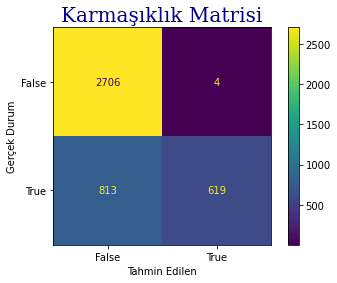

In [29]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline

karmasiklikMatrisi = np.array([[TN,FN],[FP,TP]])
kM_gorsel = metrics.ConfusionMatrixDisplay(confusion_matrix = karmasiklikMatrisi, display_labels = [False, True])

kM_gorsel.plot()
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.title("Karmaşıklık Matrisi", fontdict = {'family':'serif','color':'Darkblue','size':20})

plt.show()

# ***ÇIKARIM:***

**kategoriBulYONETMELIK** isimli fonksiyonumuz 4142 adet kayıt içinde belge türü tahmini yapmıştır.

- 623 Tebliğ kategorisinde sınıflandırılan belgenin 4 tanesi hariç hepsini  Tebliğ kategorisinde sınıflandırabilmiştir.
- 813 Tebliğ kategorisinde sınıflandırılmayan belgeyi de Tebliğ olarak sınıflandırmıştır.
- 2706 Tebliğ kategorisinde sınıflandırılmayan belgeyi de Tebliğ kategorisinde sınıflandırmamıştır.
- Kural bazlı yöntemimiz için hesaplamalar aşağıdaki gibi olmuştur.
 - **Doğruluk (Accuracy):** 0.8027522935779816
 - **Keskinlik (Precision):** 0.43226256983240224
 - **Hassasiyet (Sensitivity) / Duyarlılık (Recall):** 0.9935794542536116
 - **Özgüllük (Specificity):** 0.7689684569479965
 - **F1-Puanı (F1 Score):** 0.7150784464491825